In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Concrete_Data.csv") 
print(f'Размер данных: {data.shape}')

data.columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 
                'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 
                'Age', 'CompressiveStrength']


Размер данных: (1030, 9)


Предметная область: Строительство и материалы — прогноз прочности бетона.

Ссылка на датасет: https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set/data

Характер данных: Имитационные и экспериментальные данные.

Атрибуты датасета (8 признаков + 1 целевая переменная):
Cement - Содержание цемента (кг/м³, непрерывный)
BlastFurnaceSlag - Шлак доменной печи (кг/м³, непрерывный)
FlyAsh - Зола-унос (кг/м³, непрерывный)
Water - Вода (кг/м³, непрерывный)
Superplasticizer - Суперпластификатор (кг/м³, непрерывный)
CoarseAggregate - Крупный заполнитель (кг/м³, непрерывный)
FineAggregate - Мелкий заполнитель (кг/м³, непрерывный)
Age - Возраст образца (дней, непрерывный)
CompressiveStrength - Прочность на сжатие (МПа, непрерывный, целевая переменная)

Задача анализа: Прогнозирование прочности бетона на сжатие на основе состава смеси и возраста образца.

In [2]:
stats_list = []
for col in data.columns:
    stats_list.append({
        'Атрибут': col,
        'Среднее': data[col].mean(),
        'СКО': data[col].std(),
        'Пропуски': data[col].isnull().sum()
    })

stats_df = pd.DataFrame(stats_list)
print(stats_df.round(3))


               Атрибут  Среднее      СКО  Пропуски
0               Cement  281.168  104.506         0
1     BlastFurnaceSlag   73.896   86.279         0
2               FlyAsh   54.188   63.997         0
3                Water  181.567   21.354         0
4     Superplasticizer    6.205    5.974         0
5      CoarseAggregate  972.919   77.754         0
6        FineAggregate  773.580   80.176         0
7                  Age   45.662   63.170         0
8  CompressiveStrength   35.818   16.706         0


Пропусков нет

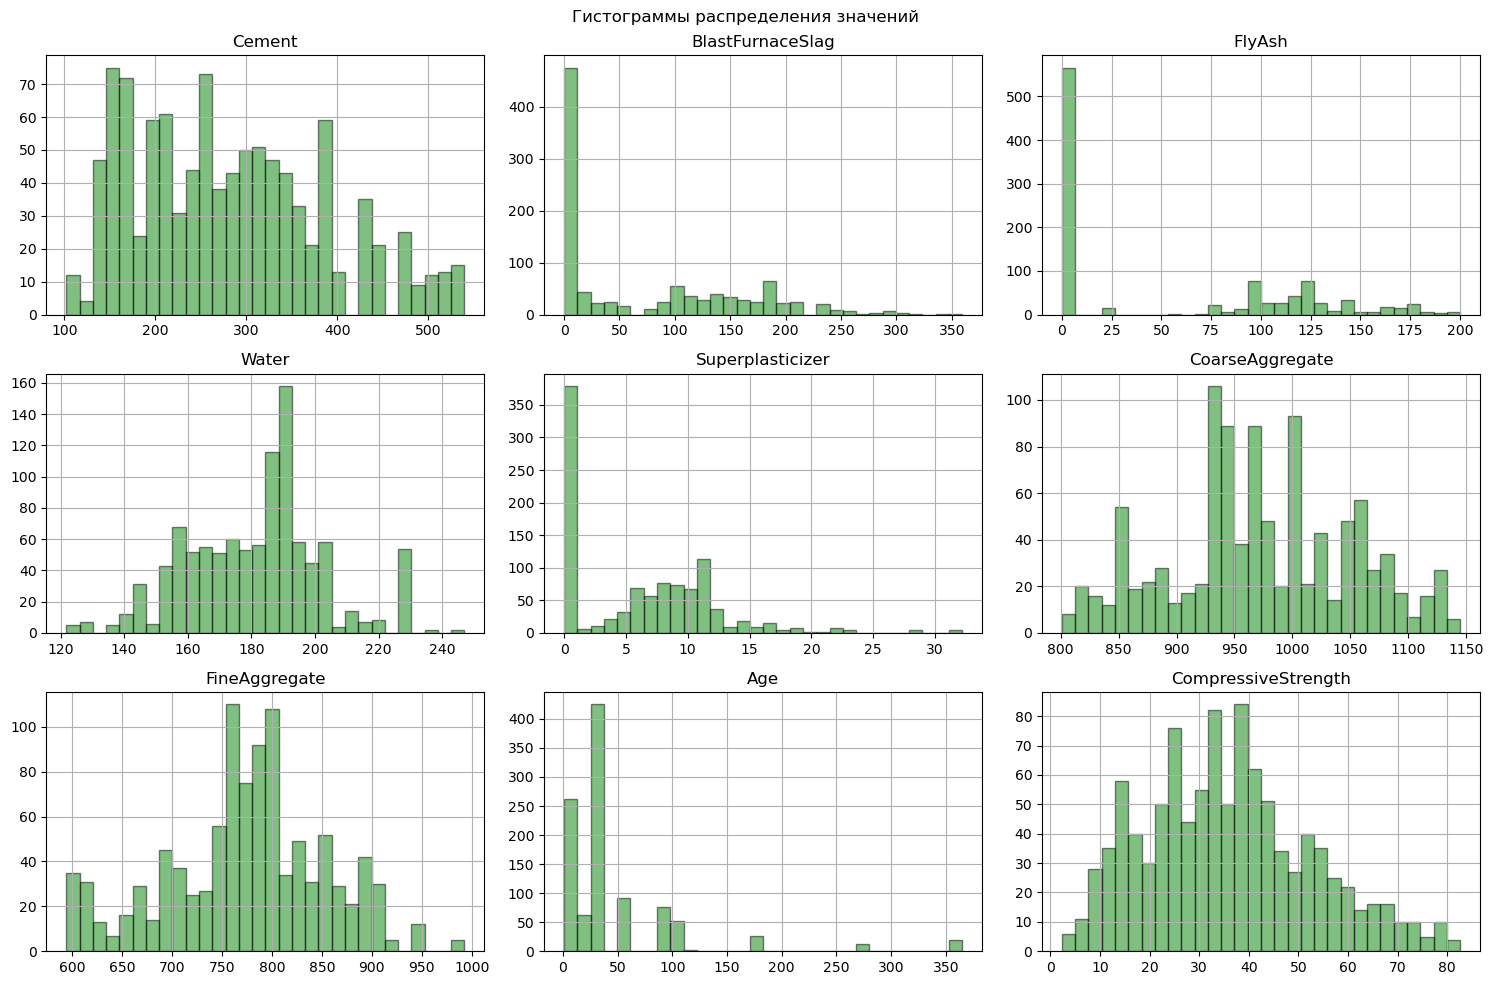

In [3]:
data.hist(bins=30, figsize=(15, 10), color='green', edgecolor='black', alpha=0.5)
plt.suptitle('Гистограммы распределения значений')
plt.tight_layout()
plt.show()


In [4]:
print("Выбросы:")
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)}")


Выбросы:
Cement: 0
BlastFurnaceSlag: 2
FlyAsh: 0
Water: 9
Superplasticizer: 10
CoarseAggregate: 0
FineAggregate: 5
Age: 59
CompressiveStrength: 4


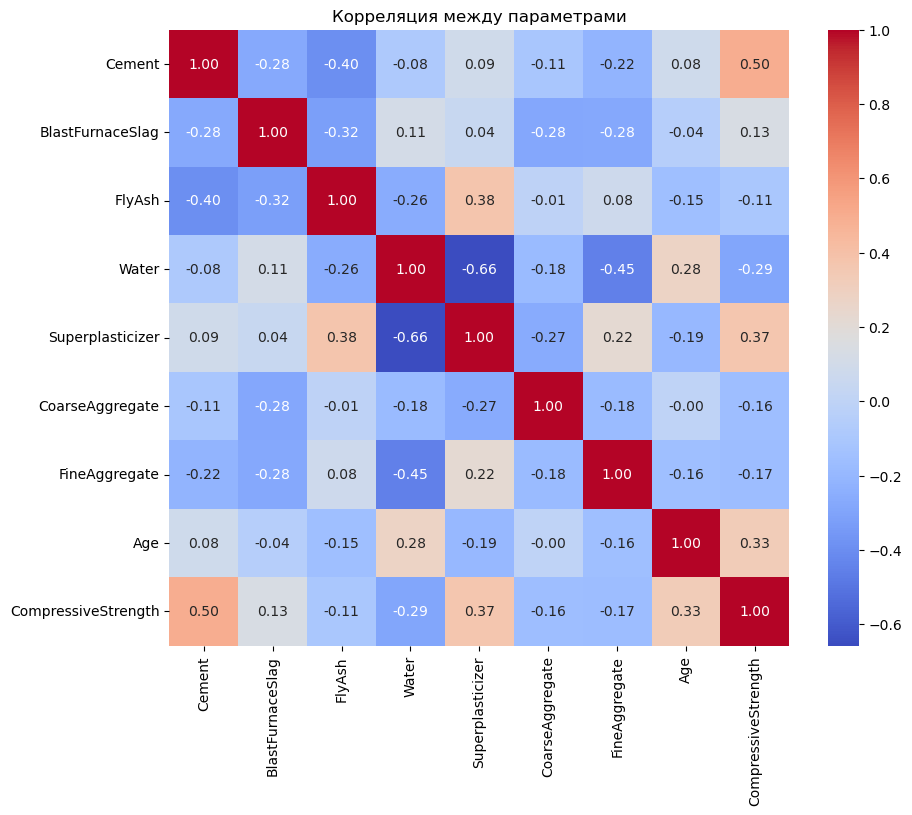

In [5]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между параметрами')
plt.show()


In [6]:
print("Высокие корреляции:")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.6:
            sign = "положительная" if corr_val > 0 else "отрицательная"
            print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]} : {corr_val:.3f} ({sign})")

print("\nОчень слабые корреляции:")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) < 0.2:
            print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_val:.3f}")


Высокие корреляции:
Water - Superplasticizer : -0.658 (отрицательная)

Очень слабые корреляции:
Cement - Water: -0.082
Cement - Superplasticizer: 0.092
Cement - CoarseAggregate: -0.109
Cement - Age: 0.082
BlastFurnaceSlag - Water: 0.107
BlastFurnaceSlag - Superplasticizer: 0.043
BlastFurnaceSlag - Age: -0.044
BlastFurnaceSlag - CompressiveStrength: 0.135
FlyAsh - CoarseAggregate: -0.010
FlyAsh - FineAggregate: 0.079
FlyAsh - Age: -0.154
FlyAsh - CompressiveStrength: -0.106
Water - CoarseAggregate: -0.182
Superplasticizer - Age: -0.193
CoarseAggregate - FineAggregate: -0.178
CoarseAggregate - Age: -0.003
CoarseAggregate - CompressiveStrength: -0.165
FineAggregate - Age: -0.156
FineAggregate - CompressiveStrength: -0.167


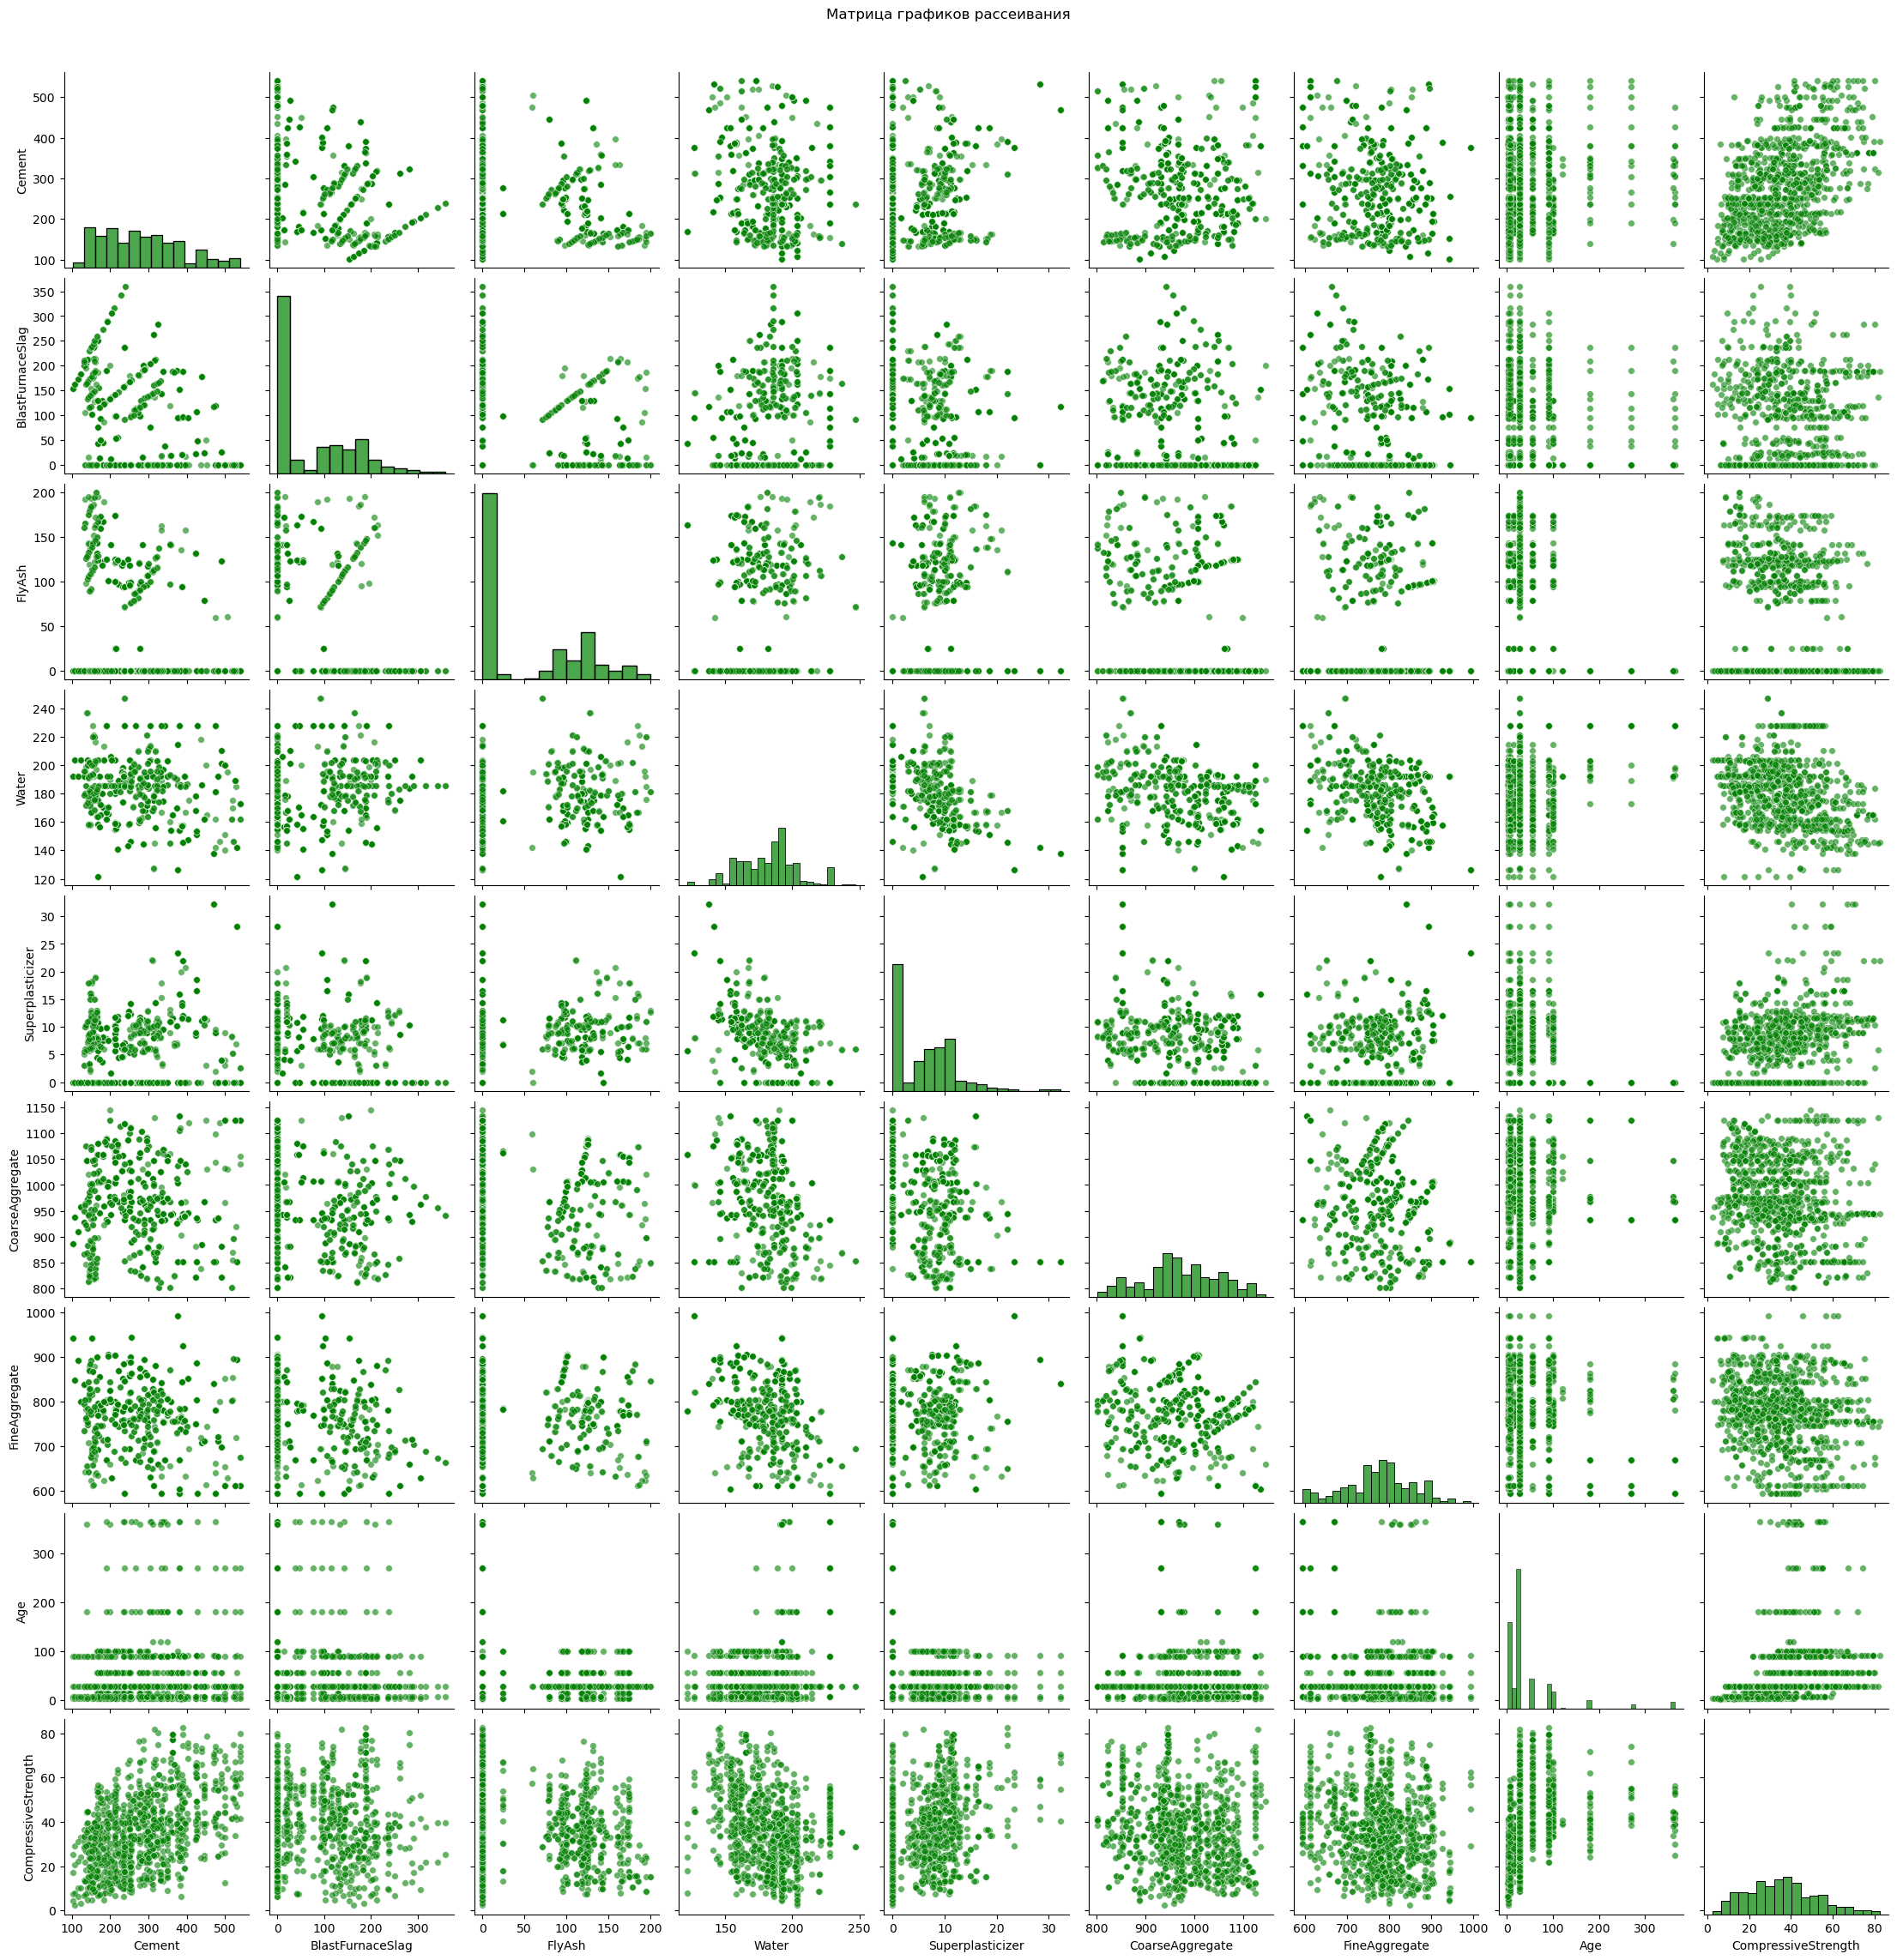

In [7]:
sns.pairplot(data, diag_kind='hist', corner=False,
             plot_kws={'alpha': 0.6, 's': 30, 'color': 'green'},
             diag_kws={'color': 'green', 'alpha': 0.7})
plt.suptitle('Матрица графиков рассеивания', y=1.02)
plt.show()


Анализ результатов:

1. Пропуски и выбросы
В данных нет пропусков. Выбросы встречаются в отдельных признаках (например, Superplasticizer, Age), но они ожидаемы для реальных технологических данных и не являются ошибками измерения.

2. Корреляционный анализ и мультиколлинеарность
Сильной мультиколлинеарности между признаками нет, однако заметны отдельные связи:
Water - Superplasticizer. Использование суперпластификатора позволяет резко уменьшить количество воды при сохранении требуемой подвижности смеси.
Cement и Superplasticizer - умеренно положительная зависимость. Большее содержание цемента часто сочетается с применением добавок.
CoarseAggregate и FineAggregate - отрицательная корреляция, что логично: увеличение одного обычно уменьшает долю другого.

3. Особенности, выявленные в данных

Взаимосвязи между основными компонентами бетона соответствуют технологической логике - комбинации цемента, воды и добавок определяют прочность.
Добавки проявляют себя слабее, поскольку эффективность зависит от длительного твердения и их процентного содержания.

